Normalized Average Seasonal Time Julian for [Ca] in the O Horizon is = 101.78

Normalized Average Seasonal Time Julian for [Si] in the O Horizon is =  93.98

The Average Normalized Seasonal Time Date of [Ca] in the O Horizon is 4/12

The Average Normalized Seasonal time Date of [Si] in the O Horizon is 4/4

Seasonality Index Percent of [Ca] in the O Horizon is =  76.77 %

Seasonality Index Percent of [Si] in the O Horizon is =  76.84 %

Average [Ca] in  the O Horizon =  55.26 ppb/month

Average [Si] in the O Horizon = 131.30 ppb/month


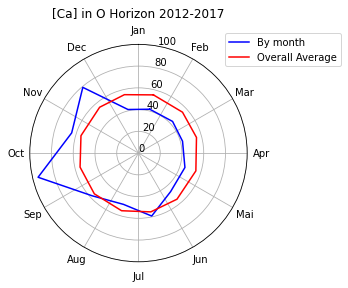

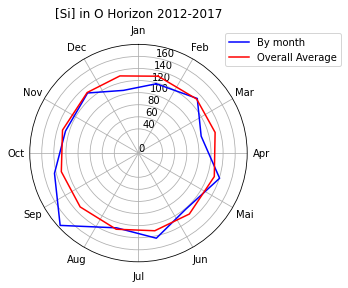


Normalized Average Seasonal Time Julian for Ca in B Horizon is  =  95.39

Normalized Average Seasonal Time Julian for Si in B Horizon is  =  91.96

The Average Normalized Seasonal Time Date for Ca in B Horizon is 4/5

The Average Normalized Seasonal Time Date for Si in B Horizon is 4/2

Seasonality Index Percent of Ca in B Horizon is =  76.43 %

Seasonality Index Percent of Si in B Horizon is =  76.35 %
Average Ca =  26.84 ppb/month
Average Si = 122.24 ppb/month


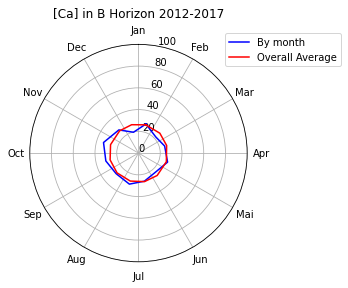

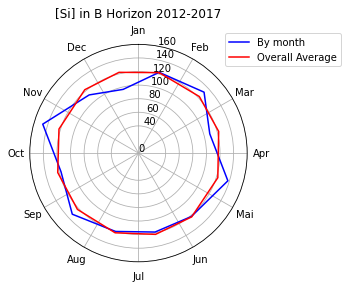

Annual Average [Ca] =  75.75 ppb
Annual Average [Si] = 150.39 ppb


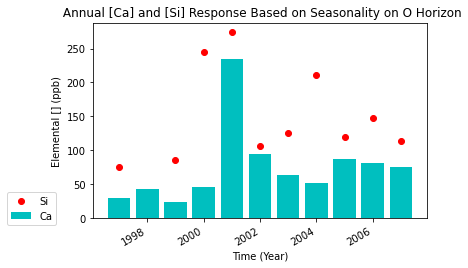

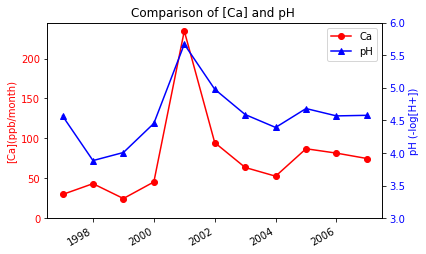

Text(0.5, 1.0, 'Mineral Saturations')

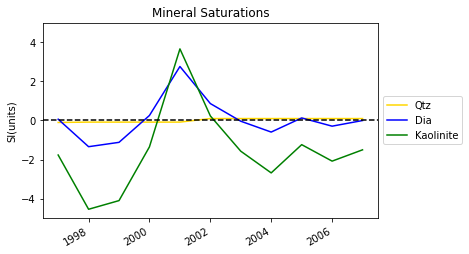

In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Fri Nov 26 13:12:22 2021

@author: ashleygrengs

Coding to be transferred into Jupyter notebook for final project --> Needs to broken down into markdown blocks for final report

Notes: 
    Calicum = Ca = 1 = C
    Silicon = H4SiO4 = Si = 2 = S
    Organic (O) Horizon = grouping of Oa, Oe, Oa 
    Mineral (B) Horizon = grouping of Bs2, Bs, Bhs3, Bhs1, Bhs, Bh

Background Info: In October of 1999, Hubbard Brook Experimental Forest (HB) had 45 tons of wollasonite (CaSiO3)
added to one of its watersheds, specfically watershed 1 (W1). Adding wollasonite to HB's W1 was in a response of
the acid depostion depleting the soil's Ca within the northeast region. Therefore, this site was selected to 
observe how a forest system would respond to this Ca addition.

Goal/Question: How does adding wollasonite (CaSiO3) to Hubbard Brook's watershed 1 cause it's soil's [Ca] to respond?
I focus on the organic (O) and minearl (B) horizons to see where one observes a larger response to Ca.

To help answer this question I will explore a few different plots....

1) First, we need to see what exactly what is the baseline Ca and H4SiO4 concentration. Is this there a specific 
time/month/season in which Ca is highest without the affect of the wollasonite addition. Making the assumption
that we would see a baseline of concentrations from 2012 - 2017 by finding the averages for each month.
--> seen in plots 1 (Ca in O horizon), 2 (Si in O horizon), 3 (Ca in B horizon), 4 (Si in B horizon)

***By looking at these four plots we see the biggest change in baselines in Ca in the O horizon during 
    the month of Septemeber (and the following fall months). This may be suggestive that leaves are
    falling of this time and decomposing into the soil's soil to elevate Ca concentrations in the O horizon.
    
2) With seeing this respose, I decided to focus on the month of September in the O horizon. Now if Ca is generally 
    higher during this month how will (and potentailly) it respond during a decade timespan during the 
    addition of wollasonite? 
    --> seen in plot 5 the annual concentrations of Ca and Si based on the time when Ca was highest (Septemeber)
    **We see that Ca and Si are not directly related...so what other factors may contribute to higher Ca concenrations
    in the year 2001? 
    
3) Since the Ca addition was orginally added to help with acid depostion, I decided to see if there was a trend
    in soil's Ca conentration in the O horizon to the pH levels as seen in plot 6. We see that pH does play 
    a big/direct factor in Ca concentrations. 

4) Lastly (plot 7), I thoguht I would be able to find the minearl saturations in Minnteq and display my findings
    of mineral saturations in python. I was hoping this program would have the minearl wollasonite to see when
    the O horizon would be no longer saturated with this mineral. However, they did not have wollsonite in the system.
    Instead I plotted the three top minerals that were the most prevalent within a decade span.
    

"""
#%%Importing external libraries 

import pandas as pd
from datetime import datetime
import datetime
import numpy as np                   # functions for data analysis 
import pandas as pd                  # functions for data frames
from matplotlib import pyplot as plt # functions for plotting
import matplotlib.patches as mpatches
import scipy                         #finding r2 values
from scipy.stats.stats import pearsonr
from statistics import stdev
import datetime

#%% Specify inputs/filenames 

#Creating to store names of both input data files 
filenameW1_Soil = ['HBEF_1996-2017_Soil_Chem_W1.csv']

#Location of precip gauges
c1 = 'Hubbard Brook, NH' 
   
#%% Importing code as recomended from the following

#Importing data and it's creators info is all displayed and ran in this code block.

# Package ID: knb-lter-hbr.138.9 Cataloging System:https://pasta.edirepository.org.
# Data set title: Chemistry of freely-draining soil solutions at the Hubbard Brook Experimental Forest, Watershed 1, 1996 - present. .
# Data set creator:  Charles T Driscoll -  
# Contact:    - Information Manager Hubbard Brook Ecosystem Study  - hbr-im@lternet.edu
# Stylesheet v1.0 for metadata conversion into program: John H. Porter, Univ. Virginia, jporter@virginia.edu      

#To import data, using what HB contacts recomended for smooth transition
infile1  ="https://pasta.lternet.edu/package/data/eml/knb-lter-hbr/138/9/e531788965a5622a4ca8e664a9d06406".strip() 
infile1  = infile1.replace("https://","http://")

#Loading W1 Soils Data
dfw1S = pd.read_csv(infile1, skiprows=1, sep=",", names=["date","WS","Elev","Hor","pH","ANC","H4SiO4","Na_plus_",     
         "K_plus_","Ca2_plus_","CaFLAG", "Mg2_plus_","Alt","Alm", "Alo","NH4_plus_", "F_hyphen_",     
         "Cl_hyphen_", "SO4=","NO3_hyphen_","DIC", "DOC","TN"],
         parse_dates=['date'], na_values = [-999.99,-888.88, -777.77, 'NaN', 'Ice', 'Eqp']) 

#FINAL RECOMMENDATION FROM DATA CREATORS
# Coerce the data into the types specified in the metadata 
# Since date conversions are tricky, the coerced dates will go into a new column with _datetime appended
# This new column is added to the dataframe but does not show up in automated summaries below. 
dfw1S=dfw1S.assign(date_datetime=pd.to_datetime(dfw1S.date,errors='coerce'))  
dfw1S.WS=dfw1S.WS.astype('category')  
dfw1S.Elev=dfw1S.Elev.astype('category')  
dfw1S.Hor=dfw1S.Hor.astype('category') 
dfw1S.pH=pd.to_numeric(dfw1S.pH,errors='coerce') 
dfw1S.ANC=pd.to_numeric(dfw1S.ANC,errors='coerce') 
dfw1S.H4SiO4=pd.to_numeric(dfw1S.H4SiO4,errors='coerce') 
dfw1S.Na_plus_=pd.to_numeric(dfw1S.Na_plus_,errors='coerce') 
dfw1S.K_plus_=pd.to_numeric(dfw1S.K_plus_,errors='coerce') 
dfw1S.Ca2_plus_=pd.to_numeric(dfw1S.Ca2_plus_,errors='coerce')  
dfw1S.CaFLAG=dfw1S.CaFLAG.astype('category') 
dfw1S.Mg2_plus_=pd.to_numeric(dfw1S.Mg2_plus_,errors='coerce') 
dfw1S.Alt=pd.to_numeric(dfw1S.Alt,errors='coerce') 
dfw1S.Alm=pd.to_numeric(dfw1S.Alm,errors='coerce') 
dfw1S.Alo=pd.to_numeric(dfw1S.Alo,errors='coerce') 
dfw1S.NH4_plus_=pd.to_numeric(dfw1S.NH4_plus_,errors='coerce') 
dfw1S.F_hyphen_=pd.to_numeric(dfw1S.F_hyphen_,errors='coerce') 
dfw1S.Cl_hyphen_=pd.to_numeric(dfw1S.Cl_hyphen_,errors='coerce') 
# dfw1S.SO4=pd.to_numeric(dfw1S.SO4=,errors='coerce') 
dfw1S.NO3_hyphen_=pd.to_numeric(dfw1S.NO3_hyphen_,errors='coerce') 
dfw1S.DIC=pd.to_numeric(dfw1S.DIC,errors='coerce') 
dfw1S.DOC=pd.to_numeric(dfw1S.DOC,errors='coerce') 
dfw1S.TN=pd.to_numeric(dfw1S.TN,errors='coerce') 

#%%Refining soils dfw1S

#setting the index to date
dfw1S = dfw1S.set_index('date')

#filtering to specific columns to modify current dfw1S
dfw1S = dfw1S[['WS', 'Elev', 'Hor','Ca2_plus_', 'H4SiO4', 'date_datetime', 'pH']]

#%%#Selecting a five year span that isnt affected by CaSiO3 by selecting the five most recent years

#Creating a copy of the orginal dataset with columns above and all dates
dfw1_og = dfw1S.copy()

#this will help establish a baseline [Ca] and [H4SiO4]
startdate = pd.to_datetime('2012-12-14')
enddate = pd.to_datetime('2017-12-17') 

# Trim the data frame to data that occur between the desired baseline start date and end date
dfw1S = dfw1S[startdate:enddate]

#%%Organizing and grouping O and B soil horizons for baselines

# splitting dataframe by groups (soil horizons), grouping by particular dataframe column
grouped = dfw1S.groupby(dfw1S.Hor)
df_Oa = grouped.get_group("Oa")
df_Oe = grouped.get_group("Oe")
df_Oae = grouped.get_group("Oae")
df_Bs2 = grouped.get_group("Bs2")
df_Bs = grouped.get_group("Bs")
df_Bhs3 = grouped.get_group("Bhs3")
df_Bhs1 = grouped.get_group("Bhs1")
df_Bhs = grouped.get_group("Bhs")
df_Bh = grouped.get_group("Bh")

#remove rows with missing data doesn't work
# df_Oa.dropna(how ='all') 
##NEED TO DECIDE WHAT TO DO WITH NAN VALUES

#Combining all O horizons
df_O = pd.concat([df_Oa,df_Oe,df_Oae], ignore_index=True)
#Re-setting the index
df_O = df_O.set_index('date_datetime')
#Making sure that dates are organized from oldest to newest dates
df_O = df_O.sort_values(by='date_datetime')

#Combining all B horizons
df_B = pd.concat([df_Bs2,df_Bs,df_Bhs3,df_Bhs1,df_Bhs,df_Bh ], ignore_index=True)
#Re-setting the index
df_B = df_B.set_index('date_datetime')
#Making sure that dates are organized from oldest to newest dates
df_B = df_B.sort_values(by='date_datetime')

#%% Starting the process of items for the beloved polar plots

#Making year and days (julian) columns
df_O['YEAR'] = df_O.index.year
df_O['DAY'] = df_O.index.dayofyear
df_O['MONTH'] = df_O.index.month

#grouping by month finding mean for each month
dfmonthly_O = df_O[['Ca2_plus_', 'DAY', 'pH', 'H4SiO4']].groupby(df_O.index.month).mean()  
dfmonthly_O = dfmonthly_O.rename(columns={"DAY": "jdaymid"})

#finding the Ca & Si centroid for the calendar year
#Multipying Ca (Ca2_plus_) * time (jdaymid)
# caplus = dfmonthly_O['Ca2_plus_']*dfmonthly_O['jdaymid']
caplus = dfmonthly_O['Ca2_plus_']*dfmonthly_O['jdaymid']
siplus = dfmonthly_O['H4SiO4']*dfmonthly_O['jdaymid']

#finding sum of total Ca and Si
sum_ca = dfmonthly_O['Ca2_plus_'].sum()
sum_si = dfmonthly_O['H4SiO4'].sum()

#finding sum of time for Ca and Si
sum_tpC = caplus.sum()
sum_tpS = siplus.sum()

#sumtp / sum_ca = centreoid = day of year
centroidC = sum_tpC /sum_ca
centroidS = sum_tpS/sum_si

#converting centreoid to date and print to screen
#taking julian day (day_of_yr) to normal day
#still julian date but rounding
centroidC =str(round(centroidC))  
centroidS =str(round(centroidS))  

#%%Even more variables for compute polar plot

#Creating a new column containing angle phim (in radians) which corresponding to middle day of each month
#python thinks more about radians than degrees
dfmonthly_O['midday_month_radians'] = dfmonthly_O['jdaymid'] *2 *np.pi/365.25

#SIN of angle
dfmonthly_O['SIN'] = np.sin(np.sin(dfmonthly_O['midday_month_radians']))

#COS of angle
dfmonthly_O['COS'] = np.cos(np.sin(dfmonthly_O['midday_month_radians']))

#s = Element [] *sin of angle 
#1 = Ca, 2 = Si
s1 = sum(dfmonthly_O['Ca2_plus_']*dfmonthly_O['SIN'])
s2 = sum(dfmonthly_O['H4SiO4']*dfmonthly_O['SIN'])

#c = Element [] *cos of angle
c1 = sum(dfmonthly_O['Ca2_plus_']*dfmonthly_O['COS'])
c2 = sum(dfmonthly_O['H4SiO4']*dfmonthly_O['COS'])

#r = square root of s^2 + c^2
r1 = np.sqrt((s1**2 + c1**2))
r2 = np.sqrt((s2**2 + c2**2))

#arctan fx, arctan fx is repsecting quadrants ==phi =arc(s/c)
phi1 = np.arctan2(c1,s1)     #UNITS: radians
phi2 = np.arctan2(c2,s2)     #UNITS: radians
#convert phi to date
date_phi1 = phi1*365.25/(2*np.pi)
date_phi2 = phi2*365.25/(2*np.pi)
print("Normalized Average Seasonal Time Julian for [Ca] in the O Horizon is = %6.2f" %date_phi1)
print('')
print("Normalized Average Seasonal Time Julian for [Si] in the O Horizon is = %6.2f" %date_phi2)
print('')

#CONVERTING JULAIN (date_phi) to regualar (normal) date and rounding
season_timeC =str(round(date_phi1))  
season_timeS =str(round(date_phi2))  


#getting day
season_time_dayC = datetime.datetime.strptime(season_timeC, "%j").day
season_time_dayS = datetime.datetime.strptime(season_timeS, "%j").day

#getting month
season_time_monthC = datetime.datetime.strptime(season_timeC, "%j").month
season_time_monthS = datetime.datetime.strptime(season_timeS, "%j").month

#converting to from integers to strings in order to print
season_time_dayC = str(season_time_dayC)
season_time_dayS = str(season_time_dayS)
season_time_monthC = str(season_time_monthC)
season_time_monthS = str(season_time_monthS)
print("The Average Normalized Seasonal Time Date of [Ca] in the O Horizon is " + season_time_monthC + "/"+ season_time_dayC)
print('')
print("The Average Normalized Seasonal time Date of [Si] in the O Horizon is " + season_time_monthS + "/"+ season_time_dayS)
print('')

#seasonality index (i) i = r/p
iC = (r1/sum_ca)*100     #UNITS %
iS = (r2/sum_si)*100     #UNITS %
print( "Seasonality Index Percent of [Ca] in the O Horizon is = %6.2f %%" % iC) 
print('')
print( "Seasonality Index Percent of [Si] in the O Horizon is = %6.2f %%" % iS) 
print('')

#%% I know...even more cals for the circle plots!

#finding the avg for months
ca_month_mean = dfmonthly_O['Ca2_plus_'].mean()    #UNITS ppb/month
si_month_mean = dfmonthly_O['H4SiO4'].mean()    #UNITS ppm/month
print("Average [Ca] in  the O Horizon = %6.2f ppb/month" % ca_month_mean)
print('')
print("Average [Si] in the O Horizon = %6.2f ppb/month" % si_month_mean)

#storing average in dfmonthly_O
dfmonthly_O['Average Ca from Years and Months'] = ca_month_mean   #ppb/month
dfmonthly_O['Average Si from Years and Months'] = si_month_mean   #ppb/month

#%%Almost there....

#For Ca
r1C = dfmonthly_O['Ca2_plus_'] #avg for each month #blue
r2C = dfmonthly_O['Average Ca from Years and Months'] #avg of months (and years) #red

#For Si
r1S = dfmonthly_O['H4SiO4'] #avg for each month #blue
r2S = dfmonthly_O['Average Si from Years and Months'] #avg of months (and years) #red

#when multiply theta by r 
theta = (dfmonthly_O['midday_month_radians']) 

#%%Finally a polar plot! for Ca

#creating figure
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
# fig, ax = plt.subplots((1,2)subplot_kw={'projection': 'polar'})

#changing degree labels to months
lines, labels = plt.thetagrids((0, 30, 60, 90, 120, 150, 180, 210, 240, 270, 300, 330), 
        labels=('Jan', 'Feb', 'Mar', 'Apr', 'Mai', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'), fmt=None)

#placing Jan on North
ax.set_theta_zero_location('N') 

#making sure months go clockwise
ax.set_theta_direction(-1) 

#trying to wrap data to be contionous from Jan to Dec
wrp_theta = np.append(theta, theta[1])
#Ca
wrp_r1C = np.append(r1C, r1C[1])
wrp_r2C = np.append(r2C, r2C[1])

#plotting data
ax.plot(wrp_theta, wrp_r1C, color = 'b', label = 'By month')  #Average by month
ax.plot(wrp_theta, wrp_r2C, color = 'r', label = 'Overall Average') #Average element from years and months

# radial ticks for Ca
ax.set_rticks([0, 20, 40, 60, 80, 100])  

# Move radial labels away from plotted line
ax.set_rlabel_position(10.5)  
ax.grid(True)

#Title
ax.set_title("[Ca] in O Horizon 2012-2017", va='bottom')

#legend
ax.legend(loc=(0.9, 0.9))

plt.show()

#%%Here's another in the O Horizon but for Si in O hor

#creating figure
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})

#changing degree labels to months
lines, labels = plt.thetagrids((0, 30, 60, 90, 120, 150, 180, 210, 240, 270, 300, 330), 
        labels=('Jan', 'Feb', 'Mar', 'Apr', 'Mai', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'), fmt=None)

#placing Jan on North
ax.set_theta_zero_location('N') 

#making sure months go clockwise
ax.set_theta_direction(-1) 

#trying to wrap data to be contionous from Jan to Dec
wrp_theta = np.append(theta, theta[1])

#Si
wrp_r1S = np.append(r1S, r1S[1])
wrp_r2S = np.append(r2S, r2S[1])

#plotting data
ax.plot(wrp_theta, wrp_r1S, color = 'b', label = 'By month')  #Average by month
ax.plot(wrp_theta, wrp_r2S, color = 'r', label = 'Overall Average') #Average element from years and months

# radial ticks for Si
ax.set_rticks([0, 40, 60, 80, 100, 120, 140, 160])

# Move radial labels away from plotted line
ax.set_rlabel_position(10.5)  
ax.grid(True)

#Title
ax.set_title("[Si] in O Horizon 2012-2017", va='bottom')

#legend
ax.legend(loc=(0.9, 0.9))

plt.show()


#%% B horizon

#Making year and days (julian) columns
df_B['YEAR'] = df_B.index.year
df_B['DAY'] = df_B.index.dayofyear
df_B['MONTH'] = df_B.index.month

#grouping by month finding mean for each month
dfmonthly_B = df_B[['Ca2_plus_', 'DAY', 'pH', 'H4SiO4']].groupby(df_B.index.month).mean()  
dfmonthly_B = dfmonthly_B.rename(columns={"DAY": "jdaymid"})

#finding the element centroid for the calendar year
caplusB = dfmonthly_B['Ca2_plus_']*dfmonthly_B['jdaymid']
siplusB = dfmonthly_B['H4SiO4']*dfmonthly_B['jdaymid']

#finding sum of total Ca
sum_caB = dfmonthly_B['Ca2_plus_'].sum()
sum_siB = dfmonthly_B['H4SiO4'].sum()

#finding sum of time
sum_tpB1 = caplusB.sum()
sum_tpB2 = siplusB.sum()

#sumtp / sum_ca = centreoid = day of year
centroidB1 = sum_tpB1 /sum_caB
centroidB2 = sum_tpB2/sum_siB

#taking julian day (day_of_yr) to normal day and rounding
centroidB1 =str(round(centroidB1))  
centroidB2 =str(round(centroidB2))  

#%%computing variables for polar plot

#Creating a new column containing angle phim (in radians) 
dfmonthly_B['midday_month_radians'] = dfmonthly_B['jdaymid'] *2 *np.pi/365.25

#SIN of angle
dfmonthly_B['SIN'] = np.sin(np.sin(dfmonthly_B['midday_month_radians']))

#COS of angle
dfmonthly_B['COS'] = np.cos(np.sin(dfmonthly_B['midday_month_radians']))

#s = element *sin of angle
sB1 = sum(dfmonthly_B['Ca2_plus_']*dfmonthly_B['SIN'])
sB2 = sum(dfmonthly_B['H4SiO4']*dfmonthly_B['SIN'])

#c = element *cos of angle
cB1 = sum(dfmonthly_B['Ca2_plus_']*dfmonthly_B['COS'])
cB2 = sum(dfmonthly_B['H4SiO4']*dfmonthly_B['COS'])

#r = square root of s^2 + c^2
rB1 = np.sqrt((sB1**2 + cB1**2))
rB2 = np.sqrt((sB2**2 + cB2**2))

#arctan fx, arctan fx is repsecting quadrants ==phi =arc(s/c)
phiB1 = np.arctan2(cB1,sB1)     #UNITS: radians
phiB2 = np.arctan2(cB2,sB2)     #UNITS: radians
#convert phi to date
date_phiB1 = phiB1*365.25/(2*np.pi)
date_phiB2 = phiB2*365.25/(2*np.pi)
print('')
print("Normalized Average Seasonal Time Julian for Ca in B Horizon is  = %6.2f" %date_phiB1)
print('')
print("Normalized Average Seasonal Time Julian for Si in B Horizon is  = %6.2f" %date_phiB2)
print('')

#CONVERTING JULAIN (date_phi) to regualar date
season_timeB1 =str(round(date_phiB1))  
season_timeB2 =str(round(date_phiB2))  

#getting day
season_time_dayB1=datetime.datetime.strptime(season_timeB1, "%j").day
season_time_dayB2=datetime.datetime.strptime(season_timeB2, "%j").day

#getting month
season_time_monthB1 = datetime.datetime.strptime(season_timeB1, "%j").month
season_time_monthB2 = datetime.datetime.strptime(season_timeB2, "%j").month

#converting to from integers to strings in order to print
season_time_dayB1 = str(season_time_dayB1)
season_time_dayB2 = str(season_time_dayB2)

season_time_monthB1 = str(season_time_monthB1)
season_time_monthB2 = str(season_time_monthB2)

print("The Average Normalized Seasonal Time Date for Ca in B Horizon is " + season_time_monthB1 + "/"+ season_time_dayB1)
print('')
print("The Average Normalized Seasonal Time Date for Si in B Horizon is " + season_time_monthB2 + "/"+ season_time_dayB2)
print('')

#seasonality index (i) i = r/p
iB1 = (rB1/sum_caB)*100     #UNITS %
iB2 = (rB2/sum_siB)*100     #UNITS %

print( "Seasonality Index Percent of Ca in B Horizon is = %6.2f %%" % iB1) 
print('')
print( "Seasonality Index Percent of Si in B Horizon is = %6.2f %%" % iB2) 

#%% A few morecals for plot 

##finding the avg for months
ca_month_meanB = dfmonthly_B['Ca2_plus_'].mean()    #UNITS ppm/month
print("Average Ca = %6.2f ppb/month" % ca_month_meanB)
si_month_meanB = dfmonthly_B['H4SiO4'].mean()    #UNITS ppm/month
print("Average Si = %6.2f ppb/month" % si_month_meanB)

#storing average in df1
dfmonthly_B['Average Ca from Years and Months'] = ca_month_meanB   #ppb/month
dfmonthly_B['Average Si from Years and Months'] = si_month_meanB   #ppb/month

#%%Plot 3 Polar Plot Ca in B hor

r1B= dfmonthly_B['Ca2_plus_'] #avg for each month #blue
r2B= dfmonthly_B['Average Ca from Years and Months'] #avg of months (and years) #red
#when multiply theta by r 
thetaB = (dfmonthly_B['midday_month_radians']) 

#creating figure
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})

#changing degree labels to months

lines, labels = plt.thetagrids((0, 30, 60, 90, 120, 150, 180, 210, 240, 270, 300, 330), 
        labels=('Jan', 'Feb', 'Mar', 'Apr', 'Mai', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'), fmt=None)

#placing Jan on North
ax.set_theta_zero_location('N') 

#making sure months go clockwise
ax.set_theta_direction(-1) 

#trying to wrap data to be contionous from Jan to Dec
wrp_thetaB = np.append(theta, theta[1])
wrp_r1B = np.append(r1B, r1B[1])
wrp_r2B = np.append(r2B, r2B[1])

#plotting data
ax.plot(wrp_thetaB, wrp_r1B, color = 'b', label = 'By month')  #Average by month
ax.plot(wrp_thetaB, wrp_r2B, color = 'r', label = 'Overall Average') #Average precip from years and months

# radial ticks  
ax.set_rticks([0, 20, 40, 60, 80, 100])  

# Move radial labels away from plotted line
ax.set_rlabel_position(10.5)  
ax.grid(True)

#Title
ax.set_title("[Ca] in B Horizon 2012-2017", va='bottom')

#legend
ax.legend(loc=(0.9, 0.9))

plt.show()


#%% Si in B horizon

r1BS= dfmonthly_B['H4SiO4'] #avg for each month #blue
r2BS= dfmonthly_B['Average Si from Years and Months'] #avg of months (and years) #red
#when multiply theta by r 
thetaBS = (dfmonthly_B['midday_month_radians']) 

#creating figure
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})

#changing degree labels to months

lines, labels = plt.thetagrids((0, 30, 60, 90, 120, 150, 180, 210, 240, 270, 300, 330), 
        labels=('Jan', 'Feb', 'Mar', 'Apr', 'Mai', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'), fmt=None)

#placing Jan on North
ax.set_theta_zero_location('N') 

#making sure months go clockwise
ax.set_theta_direction(-1) 

#trying to wrap data to be contionous from Jan to Dec
wrp_thetaBS = np.append(thetaBS, thetaBS[1])
wrp_r1BS = np.append(r1BS, r1BS[1])
wrp_r2BS = np.append(r2BS, r2BS[1])

#plotting data
ax.plot(wrp_thetaBS, wrp_r1BS, color = 'b', label = 'By month')  #Average by month
ax.plot(wrp_thetaBS, wrp_r2BS, color = 'r', label = 'Overall Average') #Average precip from years and months

# radial ticks
ax.set_rticks([0, 40, 60, 80, 100, 120, 140, 160])

# Move radial labels away from plotted line
ax.set_rlabel_position(10.5)  
ax.grid(True)

#Title
ax.set_title("[Si] in B Horizon 2012-2017", va='bottom')

#legend
ax.legend(loc=(0.9, 0.9))

plt.show()

#%% Code to answer the following question
#What is the Ca response (annual) based on seasonality to focus September measurements throughout
#10 yeasrs time in the O horizon

#start date for 1997
startdate97 = pd.to_datetime('1997-9-01')

#end date for 2007
enddate07 = pd.to_datetime('2007-9-22') 

#trim OG df to Sept 1997 to Oct 2007
dfwSe_10 = dfw1_og[startdate97:enddate07]

#Just getting O horizon data from  97-07
grouped_O10 = dfwSe_10.groupby(dfwSe_10.Hor)
df_Oa10 = grouped_O10.get_group("Oa")
df_Oe10 = grouped_O10.get_group("Oe")
df_Oae10 = grouped_O10.get_group("Oae")

# #Combining all O horizons
df_O10 = pd.concat([df_Oa10,df_Oe10,df_Oae10], ignore_index=True) 
#Re-setting the index
df_O10 = df_O10.set_index('date_datetime')
#Making sure that dates are organized from oldest to newest dates
df_O10 = df_O10.sort_values(by='date_datetime')


#to just get Sept months YOU ARE HERE
groupedSEPT = df_O10.groupby(df_O10.index)
df_97 = groupedSEPT.get_group("1997-9-01")
df_98 = groupedSEPT.get_group("1998-9-16")
df_99 = groupedSEPT.get_group("1999-9-22")
df_00 = groupedSEPT.get_group("2000-9-01")
df_01 = groupedSEPT.get_group("2001-9-10")
df_02 = groupedSEPT.get_group("2002-9-25")
df_03 = groupedSEPT.get_group("2003-9-12")
df_04 = groupedSEPT.get_group("2004-9-21")
df_05 = groupedSEPT.get_group("2005-9-16")
df_06 = groupedSEPT.get_group("2006-9-08")
df_07 = groupedSEPT.get_group("2007-9-22")
# df_97 = groupedSEPT.get_group("1997-9-01", "1997-10-01")

#Combining all 97-07 all decade data
df_97_07 = pd.concat([df_97,df_98,df_99, df_00, df_01, df_02, df_03, df_04, df_05, df_06, df_07], ignore_index=False)
#Re-setting the index
# df_97_07 = df_97_07.set_index('date_datetime')
#Making sure that dates are organized from oldest to newest dates
df_97_07 = df_97_07.sort_values(by='date_datetime')

#grouping by month finding mean for each month
# dfmonthly_O10 = df_97_07[['Ca2_plus_', 'DAY']].groupby(df_B.index.month).mean()  
dfmonthly_O10 = df_97_07[['Ca2_plus_']].groupby(df_97_07.index.year).mean()  
dfmonthly_O10_pH = df_97_07[['pH']].groupby(df_97_07.index.year).mean() 
dfmonthly_O10_2 = df_97_07[['H4SiO4']].groupby(df_97_07.index.year).mean() 

#mergining dfmonthlys together with decade data
df_ca_ph = dfmonthly_O10.merge(dfmonthly_O10_pH, how = 'outer', left_index = True, right_index = True) 
df_ca_ph_si = dfmonthly_O10_2.merge(df_ca_ph, how = 'outer', left_index = True, right_index = True) 

#%%
Decade_meanC = df_ca_ph_si['Ca2_plus_'].mean()    #UNITS ppb
print("Annual Average [Ca] = %6.2f ppb" % Decade_meanC)
Decade_meanS = df_ca_ph_si['H4SiO4'].mean()    #UNITS ppb
print("Annual Average [Si] = %6.2f ppb" % Decade_meanS)

#storing average in df1
df_ca_ph_si['Decade Average Ca Mean'] = Decade_meanC  
df_ca_ph_si['Decade Average Si Mean'] = Decade_meanS

#%%Plotting Sept (O Horizon) decade worth of data based on seasonlity

fig, (ax1) = plt.subplots()
    
ax1.scatter(df_ca_ph_si.index, df_ca_ph_si['H4SiO4'], linestyle = '-', color = 'r', label = 'Si')

ax1.bar(df_ca_ph_si.index, df_ca_ph_si['Ca2_plus_'], color = 'c', label = 'Ca')

ax1.set_ylabel('Elemental [] (ppb)', color='k')   
         
# Set the y-axis to start at 0 (default is to offset 0 from the axis)
ax1.set_ylim(bottom = 0)

# Make tick labels diagonal to avoid overlap
fig.autofmt_xdate()   

# Title the plot 
ax1.set_title(' Annual [Ca] and [Si] Response Based on Seasonality on O Horizon')

#Create a black x-axis label for primary gauge
ax1.set_xlabel('Time (Year)', color='k')   

#labs = [l.get_label() for l in lines]
ax1.legend(loc='best')
ax1.legend(loc = "center left", bbox_to_anchor=(-0.27, 0.05))


#%%#%% Plot [Ca], pH, Time

# Create plot to display Ca data
fig, ax1 = plt.subplots()
line1 = ax1.plot(df_ca_ph['Ca2_plus_'], color = 'r', marker = 'o', linestyle = '-', label = 'Ca')    
 # x = date
    
#Si line if wanted to see if pH plays a part..which it does not...
# line3 = ax1.plot(dfmonthly_O10_2['H4SiO4'], color ='g', marker ='o', linestyle = '-', label = 'Si')

ax1.set_ylabel('[Ca](ppb/month)', color='r')   

# For loop to make each y-tick label red 
for tl in ax1.get_yticklabels():
    tl.set_color('r')          

# Set the y-axis to start at 0 (default is to offset 0 from the axis)
ax1.set_ylim(bottom = 0)

# Make tick labels diagonal to avoid overlap
fig.autofmt_xdate()                

# Create second axis for discharge data on top of precipitation data
ax2 = ax1.twinx()
line2 = ax2.plot(df_ca_ph['pH'],'b^-',label = 'pH')

# Set the y-axis bounds to start at 0 and end at 10
ax2.set_ylim(bottom = 3, top = 6)

# Make the y-axis label and tick labels match the line color.
ax2.set_ylabel('pH (-log[H+])', color='b')      # create blue y-axis label
for t2 in ax2.get_yticklabels():
    t2.set_color('b')            # make y-tick labels blue
   
# Title the plot
ax1.set_title('Comparison of [Ca] and pH ')

# Add a legend with data from both axes
lines = line1 + line2
labs = [l.get_label() for l in lines]
ax1.legend(lines, labs, loc='best')

# Display finished plot immediately
plt.show()

#%%Plot 7: Mineral Saturation

fileNameS = 'Complied_SI.csv'

dfSI = pd.read_csv(fileNameS, delimiter=",", header=0,
                  parse_dates=['Year'], index_col=['Year'],
                  na_values = [-999.99,-888.88, -777.77, 'NaN', 'Ice', 'Eqp']) 

#creating a plot with four subplots
fig, (ax1) = plt.subplots()
#plot 1b precip (cm/hr)
ax1.plot((dfSI['Quartz']),'-',color ='gold',label = 'Qtz') 
ax1.plot((dfSI['Diaspore']),'-',color='b',label = 'Dia') 
ax1.plot((dfSI['Kaolinite']),'-',color='g',label = 'Kaolinite') 

ax1.set_ylabel('SI(units)')
ax1.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))

ax1.set_ylim(bottom = -5)
ax1.set_ylim(top = 5)

# Make tick labels diagonal to avoid overlap
fig.autofmt_xdate() 

# plt.axvline(x=0, ymin=0, ymax=1)
plt.axhline(y=0, xmin=0, xmax=1, color ='k', linestyle = '--')

# Title the plot
ax1.set_title('Mineral Saturations')


##I hope this is the end or for at least now :-) ...
## I should re-look and try to make some of these cals into functions
##I also plan to re-look at my cals for the circle stats--isn't the graph and the dates suppose to line up?
